In [1]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
import datetime as dt
from random import seed
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import backend as K
tf.compat.v1.experimental.output_all_intermediates(True)

In [2]:
tf.random.set_seed(36)

## Dataset

In [3]:
BASE_DIR_PATH = '../Datasets/typhoons'
TRAIN_PATH = os.path.join(BASE_DIR_PATH, 'train')
VAL_PATH = os.path.join(BASE_DIR_PATH, 'val')
TEST_PATH = os.path.join(BASE_DIR_PATH, 'test')

In [4]:
def load_files(df_list, file_path):
    '''
    Loading the files from file_path into a list called df_list as pandas DataFrames
    '''
    file_names = os.listdir(file_path)
    print(file_names)
    
    for file in file_names:
        tmp = pd.read_csv(os.path.join(file_path, file))
        df_list.append(tmp)

In [5]:
train_data = []
val_data = []
test_data = []

load_files(train_data, TRAIN_PATH)
load_files(val_data, VAL_PATH)
load_files(test_data, TEST_PATH)

['ambo_2016.csv', 'auring_2017.csv', 'bising_2017.csv', 'butchoy_2016.csv', 'carina_2016.csv', 'crising_2017.csv', 'dante_2017.csv', 'dindo_2016.csv', 'emong_2017.csv', 'enteng_2016.csv', 'fabian_2017.csv', 'ferdie_2016.csv', 'gener_2016.csv', 'helen_2016.csv', 'igme_2016.csv', 'julian_2016.csv', 'karen_2016.csv', 'lawin_2016.csv', 'marce_2016.csv', 'nina_2016.csv']
['gorio_2017.csv', 'isang_2017.csv', 'jolina_2017.csv', 'kiko_2017.csv', 'lannie_2017.csv', 'nando_2017.csv', 'odette_2017.csv']
['paolo_2017.csv', 'quedan_2017.csv', 'ramil_2017.csv', 'salome_2017.csv', 'tino_2017.csv', 'urduja_2017.csv', 'vinta_2017.csv']


In [6]:
train_data[0]

,Unnamed: 0,datetime,month,day,hour,t,Station,x,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel,Discharge,Cross_Section,Velocity,fric_coeff,slope
0,8448,2016-06-26 00:00:00,6,26,0,0.0,Montalban,0,0,0,0,0,0,20.52,8.918747,615.60,0.014488,0.035,0.002000
1,8449,2016-06-26 00:00:00,6,26,0,0.0,Sto_Nino,14420,0,0,0,0,0,11.95,15.963477,788.70,0.020240,0.033,0.000667
2,8450,2016-06-26 01:00:00,6,26,1,3600.0,Montalban,0,0,0,0,0,0,20.52,8.918747,615.60,0.014488,0.035,0.002000
3,8451,2016-06-26 01:00:00,6,26,1,3600.0,Sto_Nino,14420,0,0,0,0,0,11.95,15.963477,788.70,0.020240,0.033,0.000667
4,8452,2016-06-26 02:00:00,6,26,2,7200.0,Montalban,0,0,0,0,0,0,20.51,8.829671,615.30,0.014350,0.035,0.002000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,8587,2016-06-28 21:00:00,6,28,21,248400.0,Sto_Nino,14420,0,0,0,0,0,11.97,16.360817,790.02,0.020709,0.033,0.000667
140,8588,2016-06-28 22:00:00,6,28,22,252000.0,Montalban,0,0,0,0,0,0,20.53,9.008703,615.90,0.014627,0.035,0.002000
141,8589,2016-06-28 22:00:00,6,28,22,252000.0,Sto_Nino,14420,0,0,0,0,0,11.97,16.360817,790.02,0.020709,0.033,0.000667
142,8590,2016-06-28 23:00:00,6,28,23,255600.0,Montalban,0,0,0,0,0,0,20.53,9.008703,615.90,0.014627,0.035,0.002000


In [7]:
def get_cols(df_list):
    '''
    Get relevant columns for each DataFrame in df_list
    '''
    for i, df in enumerate(df_list):
        df = df[[
            'x', 
            't', 
            'fric_coeff', 
            'slope', 
            'Rainfall_Aries', 
            'Rainfall_Boso', 
            'Rainfall_Campana', 
            'Rainfall_Nangka', 
            'Rainfall_Oro', 
            'Waterlevel', 
            'Velocity'
        ]]
        
        df_list[i] = df

In [8]:
get_cols(train_data)
get_cols(val_data)
get_cols(test_data)

In [9]:
train_data[0]

,x,t,fric_coeff,slope,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel,Velocity
0,0,0.0,0.035,0.002000,0,0,0,0,0,20.52,0.014488
1,14420,0.0,0.033,0.000667,0,0,0,0,0,11.95,0.020240
2,0,3600.0,0.035,0.002000,0,0,0,0,0,20.52,0.014488
3,14420,3600.0,0.033,0.000667,0,0,0,0,0,11.95,0.020240
4,0,7200.0,0.035,0.002000,0,0,0,0,0,20.51,0.014350
...,...,...,...,...,...,...,...,...,...,...,...
139,14420,248400.0,0.033,0.000667,0,0,0,0,0,11.97,0.020709
140,0,252000.0,0.035,0.002000,0,0,0,0,0,20.53,0.014627
141,14420,252000.0,0.033,0.000667,0,0,0,0,0,11.97,0.020709
142,0,255600.0,0.035,0.002000,0,0,0,0,0,20.53,0.014627


## Window Generator

In [10]:
sto_nino_train = []
sto_nino_val = []
sto_nino_test = []

montalban_train = []
montalban_val = []
montalban_test = []

In [11]:
def get_station_data(df_list, sto_nino_data, montalban_data):
    '''
    Get data from Sto. Nino and Montalban station from DataFrames in df_list and store it in station_data
    '''
    for df in df_list:
        tmp_s = df[df['x'] == 14420]
        sto_nino_data.append(tmp_s)
        
        tmp_m = df[df['x'] == 0]
        montalban_data.append(tmp_m)

In [12]:
get_station_data(train_data, sto_nino_train, montalban_train)
get_station_data(val_data, sto_nino_val, montalban_val)
get_station_data(test_data, sto_nino_test, montalban_test)

In [13]:
sto_nino_train[0]

,x,t,fric_coeff,slope,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel,Velocity
1,14420,0.0,0.033,0.000667,0,0,0,0,0,11.95,0.020240
3,14420,3600.0,0.033,0.000667,0,0,0,0,0,11.95,0.020240
5,14420,7200.0,0.033,0.000667,0,0,0,0,0,11.94,0.020009
7,14420,10800.0,0.033,0.000667,0,0,0,0,0,11.94,0.020009
9,14420,14400.0,0.033,0.000667,0,0,0,0,0,11.93,0.019779
...,...,...,...,...,...,...,...,...,...,...,...
135,14420,241200.0,0.033,0.000667,0,0,0,0,0,11.98,0.020947
137,14420,244800.0,0.033,0.000667,0,0,0,0,0,11.98,0.020947
139,14420,248400.0,0.033,0.000667,0,0,0,0,0,11.97,0.020709
141,14420,252000.0,0.033,0.000667,0,0,0,0,0,11.97,0.020709


In [14]:
montalban_train[0]

,x,t,fric_coeff,slope,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel,Velocity
0,0,0.0,0.035,0.002,0,0,0,0,0,20.52,0.014488
2,0,3600.0,0.035,0.002,0,0,0,0,0,20.52,0.014488
4,0,7200.0,0.035,0.002,0,0,0,0,0,20.51,0.014350
6,0,10800.0,0.035,0.002,0,0,0,0,0,20.51,0.014350
8,0,14400.0,0.035,0.002,0,0,0,0,0,20.51,0.014350
...,...,...,...,...,...,...,...,...,...,...,...
134,0,241200.0,0.035,0.002,0,0,0,0,0,20.53,0.014627
136,0,244800.0,0.035,0.002,0,0,0,0,0,20.53,0.014627
138,0,248400.0,0.035,0.002,0,0,0,0,0,20.53,0.014627
140,0,252000.0,0.035,0.002,0,0,0,0,0,20.53,0.014627


In [15]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift, df, shuffle=True, label_columns=None):
        # Store the raw data.
        self.df = df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]
        
        self.shuffle = shuffle

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack([labels[:, :, self.column_indices[name]] for name in self.label_columns], axis=-1)

        # Slicing doesn't preserve static shape information, so set the shapes
        # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels
    
    # Creating tf datasets for more convenient use and integration into model in the future
    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.utils.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=self.shuffle,
            batch_size=32,)

        ds = ds.map(self.split_window)

        return ds
    
    # properties to access them as tf datasets
    @property
    def ds(self):
        return self.make_dataset(self.df)

    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
            # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.ds))
            # And cache it for next time
            self._example = result
        return result

In [16]:
sample = WindowGenerator(
        input_width=6, label_width=6, shift=1,
        df = sto_nino_train[0],
        label_columns=['Waterlevel', 'Velocity']
    )

sample

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [1 2 3 4 5 6]
Label column name(s): ['Waterlevel', 'Velocity']

In [17]:
sample.example

(<tf.Tensor: shape=(32, 6, 11), dtype=float32, numpy=
 array([[[1.4420000e+04, 1.0800000e+04, 3.3000000e-02, ...,
          0.0000000e+00, 1.1940000e+01, 2.0008801e-02],
         [1.4420000e+04, 1.4400000e+04, 3.3000000e-02, ...,
          0.0000000e+00, 1.1930000e+01, 1.9779429e-02],
         [1.4420000e+04, 1.8000000e+04, 3.3000000e-02, ...,
          0.0000000e+00, 1.1930000e+01, 1.9779429e-02],
         [1.4420000e+04, 2.1600000e+04, 3.3000000e-02, ...,
          0.0000000e+00, 1.1920000e+01, 1.9552112e-02],
         [1.4420000e+04, 2.5200000e+04, 3.3000000e-02, ...,
          0.0000000e+00, 1.1920000e+01, 1.9552112e-02],
         [1.4420000e+04, 2.8800000e+04, 3.3000000e-02, ...,
          0.0000000e+00, 1.1920000e+01, 1.9552112e-02]],
 
        [[1.4420000e+04, 9.7200000e+04, 3.3000000e-02, ...,
          0.0000000e+00, 1.2140000e+01, 2.5048187e-02],
         [1.4420000e+04, 1.0080000e+05, 3.3000000e-02, ...,
          0.0000000e+00, 1.2120000e+01, 2.4503954e-02],
         [1.442

In [18]:
sample.ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 6, 11), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6, 2), dtype=tf.float32, name=None))>

In [19]:
def generate_datasets(df_list, is_test=False):
    ds = None
    
    if not is_test:
        for i, df in enumerate(df_list):
            window = WindowGenerator(
                input_width=6, label_width=6, shift=1,
                df=df,
                label_columns=['Waterlevel', 'Velocity']
            )

            if i == 0:            
                ds = window.ds
            else:
                ds = ds.concatenate(window.ds)
        
        ds = ds.shuffle(buffer_size=len(list(ds)))
        return ds
    else:
        ds = {}
        typhoons = os.listdir(TEST_PATH)
        typhoons = [x[:-4] for x in typhoons]
        
        for i, df in enumerate(df_list):
            window = WindowGenerator(
                input_width=6, label_width=6, shift=1,
                df=df, shuffle=not is_test,
                label_columns=['Waterlevel', 'Velocity']
            )
            
            ds[typhoons[i]] = window.ds
            
        return ds

In [20]:
sto_nino_train_ds = generate_datasets(sto_nino_train)
montalban_train_ds = generate_datasets(montalban_train)

sto_nino_val_ds = generate_datasets(sto_nino_val)
montalban_val_ds = generate_datasets(montalban_val)

sto_nino_test_ds = generate_datasets(sto_nino_test, True)
montalban_test_ds = generate_datasets(montalban_test, True)

In [21]:
train_ds = sto_nino_train_ds.concatenate(montalban_train_ds)
train_ds = train_ds.shuffle(buffer_size=len(list(train_ds)))

val_ds = sto_nino_val_ds.concatenate(montalban_val_ds)
val_ds = val_ds.shuffle(buffer_size=len(list(val_ds)))

## Evaluation Metrics

In [22]:
def r_square(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x, axis=0)
    my = K.mean(y, axis=0)
    xm, ym = x - mx, y - my
    r_num = K.square(K.sum(xm * ym))
    x_square_sum = K.sum(xm * xm)
    y_square_sum = K.sum(ym * ym)
    r_den = (x_square_sum * y_square_sum) + K.epsilon()
    
    r = r_num / r_den
    return r

In [23]:
def NSE(y_true, y_pred):
    '''
    This is the Nash-Sutcliffe Efficiency Coefficient
    '''
    y_pred = K.flatten(y_pred)
    y_true = K.flatten(y_true)

    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

## Training

In [24]:
# For easy compiling and fitting of different models
MAX_EPOCHS = 20

def compile_and_fit(model, train_data=train_ds, val_data=val_ds, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, mode='min')

    model.compile(
        loss=tf.keras.losses.MeanSquaredError(), 
        optimizer='adam', 
        metrics=[tf.keras.metrics.MeanSquaredError(), NSE, r_square]
    )

    history = model.fit(
        train_data, 
        epochs=MAX_EPOCHS,
        validation_data=val_data,
        callbacks=[early_stopping]
    )

    return history

In [25]:
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=2)
])

In [26]:
lstm_history = compile_and_fit(lstm_model)

Epoch 1/20
132/132 [==============================] - 7s 19ms/step - loss: 50.0425 - mean_squared_error: 50.0425 - NSE: 0.3877 - r_square: 0.0966 - val_loss: 8.5912 - val_mean_squared_error: 8.5912 - val_NSE: 0.8446 - val_r_square: 0.0748
Epoch 2/20
132/132 [==============================] - 3s 11ms/step - loss: 6.8151 - mean_squared_error: 6.8151 - NSE: 0.8786 - r_square: 0.1076 - val_loss: 5.5277 - val_mean_squared_error: 5.5277 - val_NSE: 0.9272 - val_r_square: 0.0647
Epoch 3/20
132/132 [==============================] - 3s 13ms/step - loss: 3.6106 - mean_squared_error: 3.6106 - NSE: 0.9365 - r_square: 0.1007 - val_loss: 2.5915 - val_mean_squared_error: 2.5915 - val_NSE: 0.9636 - val_r_square: 0.0500
Epoch 4/20
132/132 [==============================] - 3s 11ms/step - loss: 1.2859 - mean_squared_error: 1.2859 - NSE: 0.9783 - r_square: 0.0808 - val_loss: 0.8650 - val_mean_squared_error: 0.8650 - val_NSE: 0.9872 - val_r_square: 0.0753
Epoch 5/20
132/132 [==============================

## Predictions

In [30]:
# paolo 2017
sto_nino_test_df = sto_nino_test[0]
sto_nino_test_df

,x,t,fric_coeff,slope,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel,Velocity
1,14420,0.0,0.033,0.000667,0,0,0,0,0,12.74,0.046266
3,14420,3600.0,0.033,0.000667,0,0,0,0,0,12.71,0.044954
5,14420,7200.0,0.033,0.000667,0,0,0,0,0,12.70,0.044523
7,14420,10800.0,0.033,0.000667,0,0,0,0,0,12.70,0.044523
9,14420,14400.0,0.033,0.000667,0,0,0,0,0,12.69,0.044096
...,...,...,...,...,...,...,...,...,...,...,...
327,14420,586800.0,0.033,0.000667,0,0,0,0,0,12.31,0.030064
329,14420,590400.0,0.033,0.000667,0,0,0,0,0,12.31,0.030064
331,14420,594000.0,0.033,0.000667,0,0,0,0,0,12.31,0.030064
333,14420,597600.0,0.033,0.000667,0,0,0,0,0,12.31,0.030064


In [31]:
sto_nino_y_true = sto_nino_test_df[['Waterlevel', 'Velocity']]
sto_nino_y_true = sto_nino_y_true.values
sto_nino_y_true

array([[12.74      ,  0.0462663 ],
       [12.71      ,  0.04495427],
       [12.7       ,  0.04452341],
       [12.7       ,  0.04452341],
       [12.69      ,  0.04409577],
       [12.67      ,  0.04325006],
       [12.66      ,  0.04283196],
       [12.66      ,  0.04283196],
       [12.64      ,  0.04200518],
       [12.64      ,  0.04200518],
       [12.63      ,  0.04159647],
       [12.66      ,  0.04283196],
       [12.66      ,  0.04283196],
       [12.67      ,  0.04325006],
       [12.65      ,  0.04241701],
       [12.65      ,  0.04241701],
       [12.64      ,  0.04200518],
       [12.64      ,  0.04200518],
       [12.63      ,  0.04159647],
       [12.63      ,  0.04159647],
       [12.61      ,  0.04078832],
       [12.59      ,  0.03999242],
       [12.58      ,  0.03959902],
       [12.58      ,  0.03959902],
       [12.57      ,  0.03920864],
       [12.56      ,  0.03882125],
       [12.55      ,  0.03843685],
       [12.55      ,  0.03843685],
       [12.53      ,

In [32]:
sto_nino_y_true_h = sto_nino_y_true[1:,0]
sto_nino_y_true_v = sto_nino_y_true[1:,1]

In [33]:
np.set_printoptions(suppress=True)

In [35]:
test_event = sto_nino_test_ds['paolo_2017']
test_event

<_MapDataset element_spec=(TensorSpec(shape=(None, 6, 11), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6, 2), dtype=tf.float32, name=None))>

In [36]:
for x, y in test_event.take(1):
    print(x[:2])
    print(lstm_model(x[:2]))
    print(y[:2])
    break

tf.Tensor(
[[[14420.             0.             0.033          0.00066667
       0.             0.             0.             0.
       0.            12.74           0.0462663 ]
  [14420.          3600.             0.033          0.00066667
       0.             0.             0.             0.
       0.            12.71           0.04495427]
  [14420.          7200.             0.033          0.00066667
       0.             0.             0.             0.
       0.            12.7            0.04452341]
  [14420.         10800.             0.033          0.00066667
       0.             0.             0.             0.
       0.            12.7            0.04452341]
  [14420.         14400.             0.033          0.00066667
       0.             0.             0.             0.
       0.            12.69           0.04409577]
  [14420.         18000.             0.033          0.00066667
       0.             0.             0.             0.
       0.            12.67          

In [25]:
sto_nino_y_pred_h = []
sto_nino_y_pred_v = []
batch_num = 1

for x, y in sto_nino_window.test:
    predictions = lstm_model(x)
    
    if batch_num == 1:
        for i in range(len(predictions[0])):
            sto_nino_y_pred_h.append(predictions[0][i][0])
            sto_nino_y_pred_v.append(predictions[0][i][1])
            
        for i in range(1, len(predictions)):
            sto_nino_y_pred_h.append(predictions[i][-1][0])
            sto_nino_y_pred_v.append(predictions[i][-1][1])
            
        batch_num += 1
        
    else:
        for i in range(len(predictions)):
            sto_nino_y_pred_h.append(predictions[i][-1][0])
            sto_nino_y_pred_v.append(predictions[i][-1][1])
            
sto_nino_y_pred_h = np.array(sto_nino_y_pred_h)
sto_nino_y_pred_v = np.array(sto_nino_y_pred_v)

In [26]:
sto_nino_y_pred_h

array([11.883215 , 13.782366 , 14.075414 , 14.115784 , 14.121259 ,
       17.197086 , 17.197086 , 17.197086 , 17.197086 , 17.197086 ,
       17.197086 , 17.197086 , 17.197086 , 17.197086 , 17.197086 ,
       17.197086 , 17.197086 , 17.197086 , 17.197086 , 17.197086 ,
       17.197086 , 17.197086 , 17.197086 , 17.197086 , 17.197086 ,
       17.197086 , 17.197086 , 17.197086 , 17.197086 , 17.197086 ,
       17.197086 , 17.197086 , 17.197086 , 17.197086 , 17.197086 ,
       17.197086 , 17.197086 , 17.197086 , 17.197086 , 17.197086 ,
       17.197086 , 17.197086 , 17.197086 , 17.197086 , 17.197086 ,
       17.197086 , 17.197086 , 17.197086 , 17.197086 , 17.197086 ,
       17.197086 , 17.197086 , 17.197086 , 17.197086 , 17.197086 ,
       17.197086 , 17.197086 , 17.197086 , 17.197086 , 17.197086 ,
       17.197086 , 17.197086 , 17.197086 , 17.197086 , 17.197086 ,
       17.197086 , 17.197086 , 17.197086 , 17.197086 , 17.197086 ,
       17.197086 , 17.197086 , 17.197086 , 17.197086 , 17.1970

In [27]:
sto_nino_SS_res_h = np.sum(np.square(sto_nino_y_true_h - sto_nino_y_pred_h)) 
sto_nino_SS_tot_h = np.sum(np.square(sto_nino_y_true_h - np.mean(sto_nino_y_true_h))) 

sto_nino_nse_h =  1 - sto_nino_SS_res_h/sto_nino_SS_tot_h
sto_nino_nse_h

-67.66307108758096

In [28]:
import matplotlib.pyplot as plt

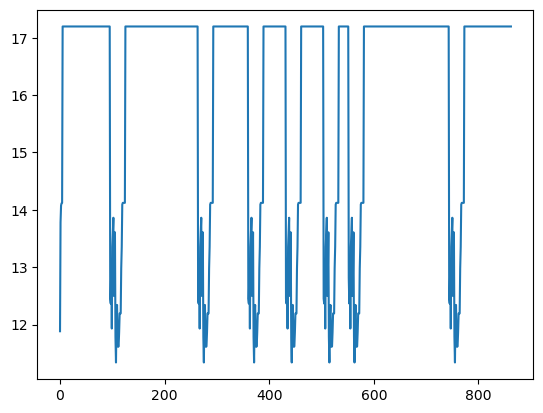

In [29]:
plt.plot(sto_nino_y_pred_h)